Gerekli kütüphanelerin yüklenmesi

In [ ]:
#ses dosyalarını işlemek için librosa
import librosa
from librosa import display
#array oluşturmak için numpy
import numpy
#dosyaları taramak için os
import os
#spektogramları kaydetmek için matplotlib
import matplotlib.pyplot

Spektogram fonksiyonunun tanımlanması

In [ ]:
def create_spectogram(ats, timR):
    spec = librosa.feature.melspectrogram(y=ats, sr = timR)
    spec_convert = librosa.amplitude_to_db(spec, ref=numpy.max)
    return spec_convert

Spektogram fonksityonunun tanımlanması için bir örnek seçip, load ile time-series oluştur

In [ ]:
sound1 = 'UrbanSound8K/audio/fold1/7061-6-0-0.wav'
ats1, sr1 = librosa.load(sound1)

sound2 = 'UrbanSound8K/audio/fold1/7383-3-0-0.wav'
ats2, sr2 = librosa.load(sound2)

Farklı seslerden gelen verileri karşılaştır. Sesin süresi hangi veriyi etkiliyor?

In [ ]:
print(f"sound 1 sample rate: {sr1} sound 2 sample rate: {sr2} \nsound 1 atsLength: {len(ats1)} sound 2 atsLength: {len(ats2)}")

sound 1 sample rate: 22050 sound 2 sample rate: 22050 
sound 1 atsLength: 49613 sound 2 atsLength: 88200


Spektogram fonksionunu test et

In [ ]:
spektogram1 = create_spectogram(ats1, sr1)
spektogram2 = create_spectogram(ats2, sr2)

print(f"spektogram1 = {len(spektogram1)} spektogram2 = {len(spektogram2)}")

spektogram1 = 128 spektogram2 = 128


Sesler farklı uzunlukta ama veri uzunluğu aynı. Nedenini bulmak için spektogramların yapısını incele

In [ ]:
print(f"s1 = {spektogram1.shape}, s2 = {spektogram2.shape}")

s1 = (128, 97), s2 = (128, 173)


Spektogramların her ikisinde de 128 liste var, fakat 128 listenin içindeki eleman sayısı farklı. Spektogramları inceleyerek "boşluk" yerine geçer veriyi bul. Bunun için spektogramları grafiğe dök

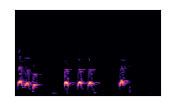

In [ ]:
matplotlib.pyplot.rcParams["figure.figsize"] = [1.8, 1.2]
matplotlib.pyplot.rcParams["figure.autolayout"] = True

fig, ax = matplotlib.pyplot.subplots(frameon = False)

#hl = 512 # number of samples per time-step in spectrogram
#hi = 128 # Height of image
#wi = 384 # Width of image

# Loading demo track
#y, sr = librosa.load(librosa.ex('trumpet'))
#window = y[0:wi*hl]

#img1 = librosa.display.specshow(spektogram1, x_axis='time', y_axis='mel', sr=sr1, fmax=8000, ax=ax)
img2 = librosa.display.specshow(spektogram2, x_axis='off', y_axis='off', sr=sr1, fmax=8000, ax=ax)

#plt.savefig("out.png")
#plt.show()

Her iki grafiğin de sağ ve üst bölgesi siyahlık. Bu durumda her iki spekrogramın da sonundaki rakamlar, siyah boşluğu ifade ediyor olabilir. Hipotezi doğrulamak için, spektoram1'in son 5 satırının son 5 sütununu kontrol et

In [ ]:
print(spektogram1[128-1][len(spektogram1[127])-6:len(spektogram1[127])-1])
print(spektogram1[128-2][len(spektogram1[127])-6:len(spektogram1[127])-1])
print(spektogram1[128-3][len(spektogram1[127])-6:len(spektogram1[127])-1])
print(spektogram1[128-4][len(spektogram1[127])-6:len(spektogram1[127])-1])
print(spektogram1[128-5][len(spektogram1[127])-6:len(spektogram1[127])-1])

[-80. -80. -80. -80. -80.]
[-80. -80. -80. -80. -80.]
[-80. -80. -80. -80. -80.]
[-80. -80. -80. -80. -80.]
[-80. -80. -80. -80. -80.]


Aynı şekilde spektoram2'nin son 5 satırının son 5 sütununu kontrol et

In [ ]:
print(spektogram2[128-1][len(spektogram2[127])-6:len(spektogram2[127])-1])
print(spektogram2[128-2][len(spektogram2[127])-6:len(spektogram2[127])-1])
print(spektogram2[128-3][len(spektogram2[127])-6:len(spektogram2[127])-1])
print(spektogram2[128-4][len(spektogram2[127])-6:len(spektogram2[127])-1])
print(spektogram2[128-5][len(spektogram2[127])-6:len(spektogram2[127])-1])

[-80. -80. -80. -80. -80.]
[-80. -80. -80. -80. -80.]
[-80. -80. -80. -80. -80.]
[-80. -80. -80. -80. -80.]
[-80. -80. -80. -80. -80.]


Spektoramlardaki siyahlığı -80. değeri ifade ediyor. Bu durumda daha kısa olan ses kayıtlarına ait spektoramların sonuna -80. ekleyerek, spektoram veri setlerinin uzunluğunu eşitleyebilirim. Bunun için tüm seslere ait spektoramların en uzununu buulmam gerekir.
Tüm ses dosyaların konumlarını bul

In [ ]:
folds = []
fileInfo = []

path = 'UrbanSound8K/audio/'

for item in os.listdir(path):
    if(os.path.isfile(path + item) == False):
        folds.append(path + item)
        
for dir in folds:
    for fileX in os.listdir(dir):
        if (fileX[len(fileX)-3:] == 'wav'):
            curFileInf = [(dir + "/" + fileX), fileX]
            fileInfo.append(curFileInf)

Toplam kaç adet ses dosyası olduğunu kontrol et

In [ ]:
len(fileInfo)

8732

Tüm dosyalar için spektogram oluştur

In [ ]:
specs = []
for Sound in fileInfo:
    curAts, curRt = librosa.load(Sound[0])
    curData = [(create_spectogram(curAts, curRt)), Sound[1]]
    specs.append(curData)
    

C:\Users\goker\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
C:\Users\goker\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
C:\Users\goker\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)


Rastgele spektogramlari kontrol et

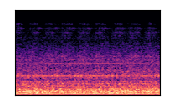

In [ ]:
matplotlib.pyplot.rcParams["figure.figsize"] = [1.8, 1.2]
matplotlib.pyplot.rcParams["figure.autolayout"] = True

fig, ax = matplotlib.pyplot.subplots(frameon = False)

img = librosa.display.specshow(specs[245][0], x_axis='off', y_axis='off', sr=sr1, fmax=8000, ax=ax)

En uzun spektogram'ı bul

In [ ]:
lengths= []

for specto in specs:
    lengths.append(len(specto[0][0]))
    
max(lengths)

174

her spektogramın satır sonlarına, aradaki fark kadar -80. ekle.

In [ ]:
spareSpecs = specs

for newSpec in spareSpecs:
    additions = []
    difference = 174 - len(newSpec[0][0])
    if (difference >= 1):
        for i in range(difference):
            additions.append(-80.)
        addSet = []
        for t in range(128):
            addSet.append(additions)
            
        newSpec[0] = numpy.append(newSpec[0], addSet, axis=1)

Herhangi bir spektrogramın uzunluğunun 174 olup olmadığını kontrol et

In [ ]:
print(len(spareSpecs[7764][0][10]))

174


Spektogramları, ilgili klasörlere kaydet

In [ ]:
for SpecFile in spareSpecs:
    
    categoryAndNext = SpecFile[1][SpecFile[1].find("-")+1:]
    category = categoryAndNext[:categoryAndNext.find("-")]
    
    fileName = SpecFile[1][:SpecFile[1].rfind(".")] + ".png"
    
    matplotlib.pyplot.rcParams["figure.figsize"] = [1.8, 1.2]
    matplotlib.pyplot.rcParams["figure.autolayout"] = True

    fig, ax = matplotlib.pyplot.subplots(frameon = False,)
    fig.frameon = False

    ax = matplotlib.pyplot.Axes(fig, [0, 0, 1, 1])
    ax.set_axis_off()
    fig.add_axes(ax)

    img = librosa.display.specshow(SpecFile[0], x_axis='off', y_axis='off', sr=sr1, fmax=8000, ax=ax)
    matplotlib.pyplot.savefig("/Spectograms/" + category + "/" + fileName)
    matplotlib.pyplot.close()

C:\Users\goker\AppData\Local\Temp\ipykernel_14564\1941404565.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  matplotlib.pyplot.savefig("Spectograms/" + category + "/" + fileName)
